# This is a the Test Simulation for MWM WD Targets

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,vstack
from targetlib import testfield_gal,testfield_fk5,testfield_ecl
from astropy.coordinates import SkyCoord
from astropy.coordinates import Galactic,FK5,BarycentricTrueEcliptic
%matplotlib inline

In [2]:
wd_north_tab = Table.read('workspace/target_files/WD/fps_north_wd.csv')
wd_south_tab = Table.read('workspace/target_files/WD/fps_south_wd.csv')
wd_tab = vstack([wd_north_tab,wd_south_tab])
wd_tab

ra,dec
float64,float64
147.255676582,-0.31968359026
147.255676582,-0.31968359026
147.758980414,1.07558474962
150.827682314,-1.08535382584
150.827682314,-1.08535382584
150.770617679,-0.586300748116
150.770617679,-0.586300748116
150.577592325,-0.0695486225203
150.577592325,-0.0695486225203


/usr/local/lib/student/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


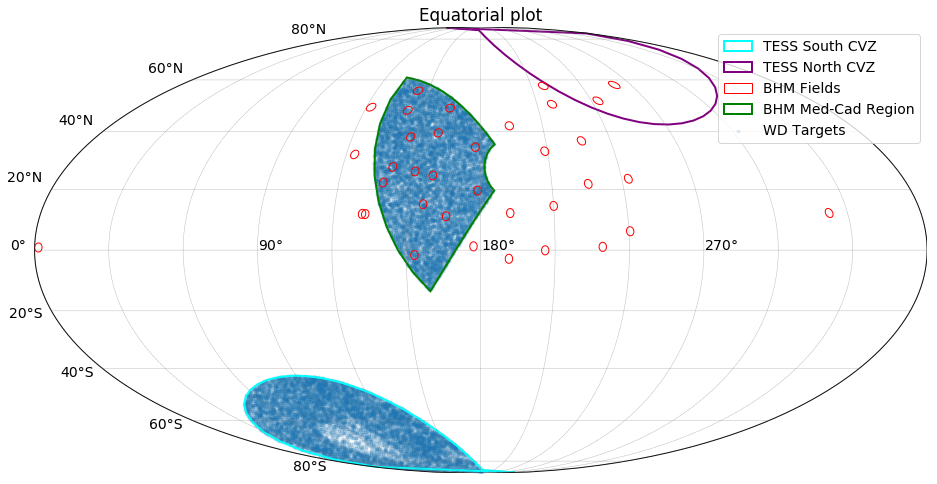

In [3]:
plt.rcParams.update({'font.size': 14})
(fig,bmap) = testfield_fk5()
#Plot WD Targets
xwd,ywd = bmap(wd_tab['ra'],wd_tab['dec'])
bmap.scatter(xwd,ywd,marker='.',label='WD Targets',alpha=0.1)
plt.title("Equatorial plot")
plt.legend()
plt.show()

## Create Target Table

In [4]:
target_tab = Table()

In [5]:
target_tab['ra'] = wd_tab['ra']
target_tab['dec'] = wd_tab['dec']
target_tab['cadence'] = np.repeat('WDcad',len(wd_tab['ra']))
target_tab['type'] = np.repeat('WD',len(wd_tab['ra']))
target_tab['priority'] = np.repeat(np.array(15,dtype='int32'),len(wd_tab['ra']))
target_tab['value'] = np.repeat(np.array(1.0,dtype='float32'),len(wd_tab['ra']))

In [6]:
target_tab

ra,dec,cadence,type,priority,value
float64,float64,str5,str2,int32,float32
147.255676582,-0.31968359026,WDcad,WD,15,1.0
147.255676582,-0.31968359026,WDcad,WD,15,1.0
147.758980414,1.07558474962,WDcad,WD,15,1.0
150.827682314,-1.08535382584,WDcad,WD,15,1.0
150.827682314,-1.08535382584,WDcad,WD,15,1.0
150.770617679,-0.586300748116,WDcad,WD,15,1.0
150.770617679,-0.586300748116,WDcad,WD,15,1.0
150.577592325,-0.0695486225203,WDcad,WD,15,1.0
150.577592325,-0.0695486225203,WDcad,WD,15,1.0


In [7]:
target_tab.write('wd_target.fits',overwrite=True)

## Create Cadence Table

In [8]:
cadence_tab = Table()

In [9]:
cadence_tab['cadence'] = ['WDcad']
cadence_tab['nepochs'] = np.array([3],dtype='int32')
cadence_tab['delta'] = [np.array([0,0.125,10000],dtype='float32')]
cadence_tab['softness'] = [np.array([1,0.025,9999],dtype='float32')]
cadence_tab['lunation'] = [np.repeat(np.array([0.35],dtype='float32'),3)]
cadence_tab['instrument'] = [np.repeat('boss',3)]

In [10]:
cadence_tab

cadence,nepochs,delta [3],softness [3],lunation [3],instrument [3]
str5,int32,float32,float32,float32,str4
WDcad,3,0.0 .. 10000.0,1.0 .. 9999.0,0.35 .. 0.35,boss .. boss


In [17]:
cadence_tab['delta'].data

array([[  0.00000000e+00,   1.25000000e-01,   1.00000000e+04]], dtype=float32)

In [12]:
cadence_tab.write('wd_cadence.fits',overwrite=True)

In [13]:
test =  Table.read('wd_cadence.fits')
test

cadence,nepochs,delta [3],softness [3],lunation [3],instrument [3]
bytes5,int32,float32,float32,float32,bytes16
WDcad,3,0.0 .. 10000.0,1.0 .. 9999.0,0.35 .. 0.35,boss .. boss
